In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [10]:
data = pd.read_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\processed_clean.csv")

X = data.drop("target", axis=1)
y = data["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

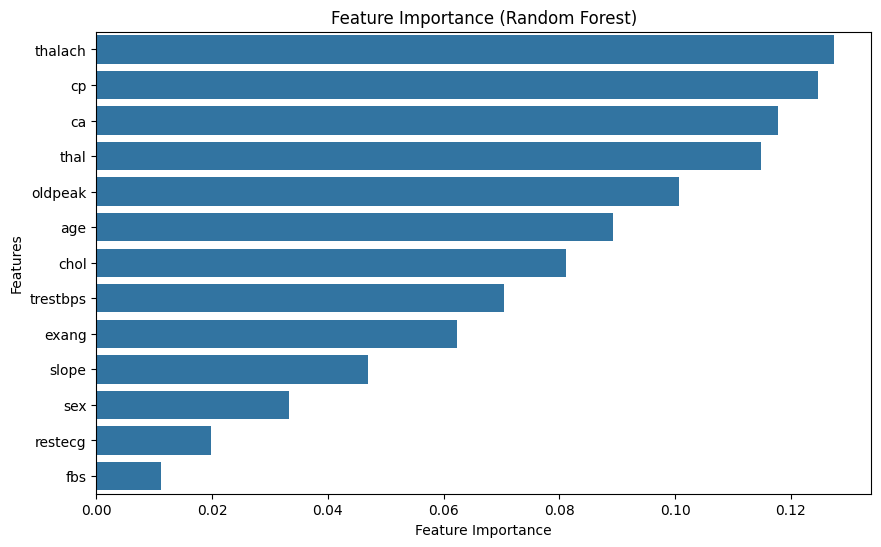

The most important variables according to Random Forest:
thalach     0.127532
cp          0.124639
ca          0.117752
thal        0.114876
oldpeak     0.100619
age         0.089359
chol        0.081193
trestbps    0.070480
exang       0.062352
slope       0.047018
sex         0.033215
restecg     0.019810
fbs         0.011155
dtype: float64


In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

print("The most important variables according to Random Forest:")
print(rf_importances)


In [12]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)

selected_features_rfe = X.columns[rfe.support_]
print("\nThe selected variables from RFE:")
print(selected_features_rfe)


The selected variables from RFE:
Index(['cp', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [13]:
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(X_minmax, y)

selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("\nthe selected variables from Chi-Square:")
print(selected_features_chi2)


the selected variables from Chi-Square:
Index(['exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


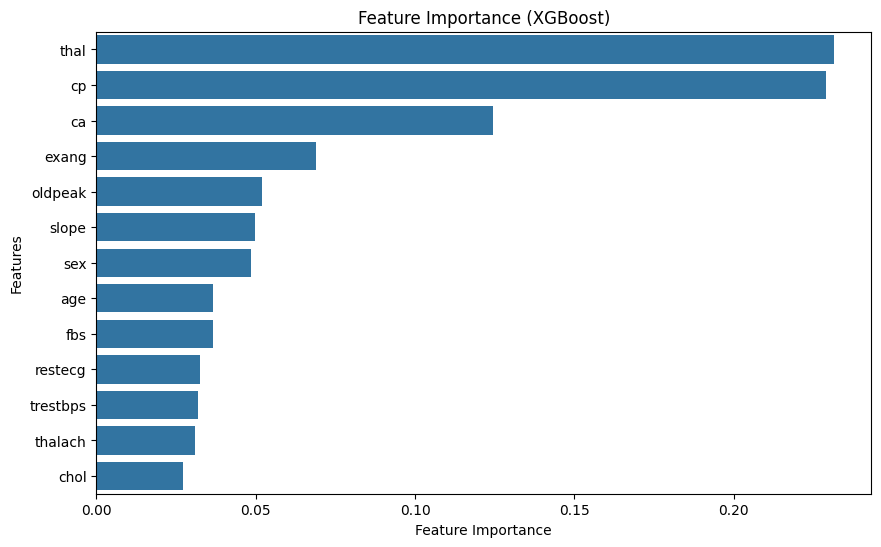


The most important variables according toXGBoost:
thal        0.231559
cp          0.228874
ca          0.124403
exang       0.069036
oldpeak     0.052039
slope       0.049645
sex         0.048629
age         0.036545
fbs         0.036517
restecg     0.032544
trestbps    0.031970
thalach     0.031035
chol        0.027203
dtype: float32


In [14]:
xgb = XGBClassifier(random_state=42, eval_metric="logloss")
xgb.fit(X_scaled, y)

xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importances, y=xgb_importances.index)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

print("\nThe most important variables according toXGBoost:")
print(xgb_importances)

In [15]:
final_features_union = set(selected_features_rfe).union(set(selected_features_chi2))

final_features_intersection = set(selected_features_rfe).intersection(set(selected_features_chi2))

print("\nSelected Variables (Union):")
print(final_features_union)

print("\nCommon Variables(Intersection):")
print(final_features_intersection)



Selected Variables (Union):
{'oldpeak', 'slope', 'cp', 'exang', 'ca', 'thal'}

Common Variables(Intersection):
{'ca', 'oldpeak', 'thal', 'exang'}


In [16]:
final_data = data[list(final_features_union) + ["target"]]

final_data.to_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\selected_features.csv", index=False)